In [14]:
# STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load Dataset
file_path = "student_feedback.csv"   # change path if needed
df = pd.read_csv(file_path)

In [15]:

# Preview data
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Dataset Shape: (1001, 10)
Columns: ['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   


In [16]:
# STEP 3: Clean Dataset
# Drop unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

# STEP 4: Average Rating per Question
question_avg = df.drop(columns=['Student ID']).mean()
print("\nAverage Rating per Question:\n", question_avg)


Average Rating per Question:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
dtype: float64



Average Rating per Question:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
Overall_Score                                           5.915460
dtype: float64


/tmp/ipython-input-2349352650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=question_avg.index, y=question_avg.values, palette="viridis")


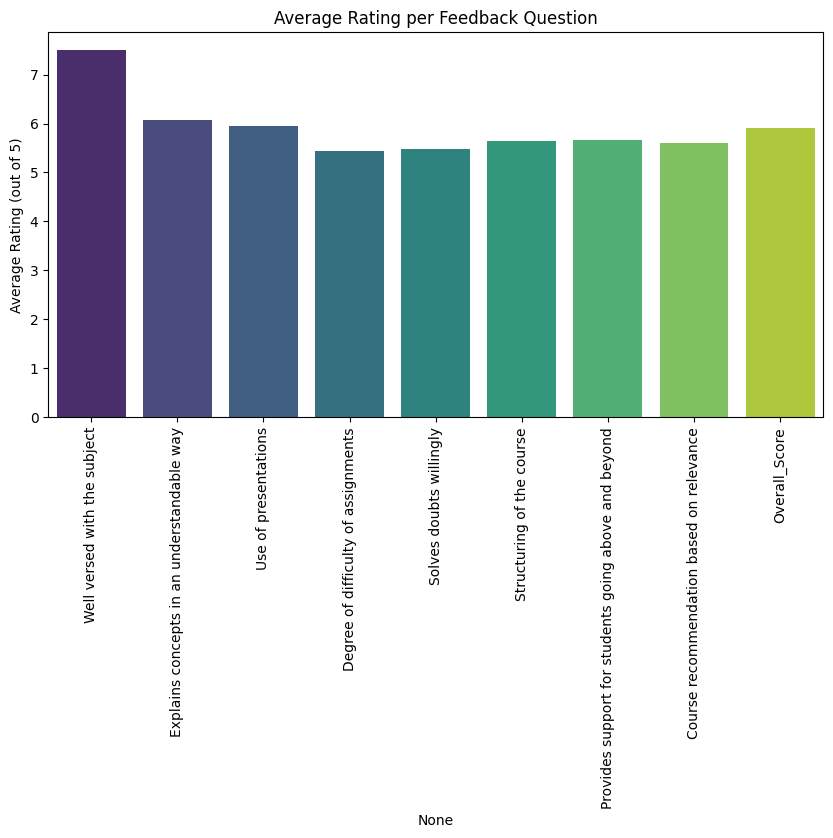

In [20]:
# STEP 4: Average Rating per Question
question_avg = df.drop(columns=['Student ID']).mean()
print("\nAverage Rating per Question:\n", question_avg)
# Plot average ratings
plt.figure(figsize=(10,5))
sns.barplot(x=question_avg.index, y=question_avg.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Rating per Feedback Question")
plt.ylabel("Average Rating (out of 5)")
plt.show()


Sample Overall Scores:
    Student ID  Overall_Score
0         340          5.000
1         253          4.875
2         680          4.375
3         806          5.875
4         632          7.500


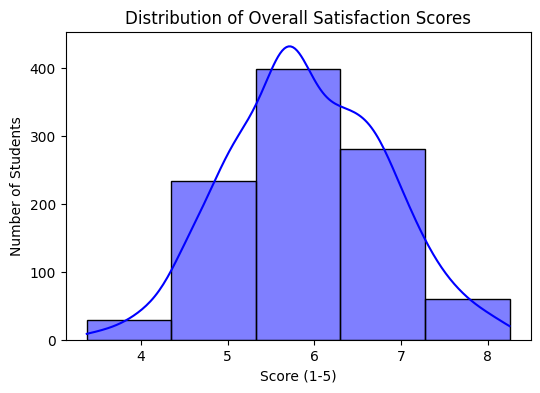


Best Rated Aspect: Well versed with the subject (7.50/5)
Worst Rated Aspect: Degree of difficulty of assignments (5.43/5)


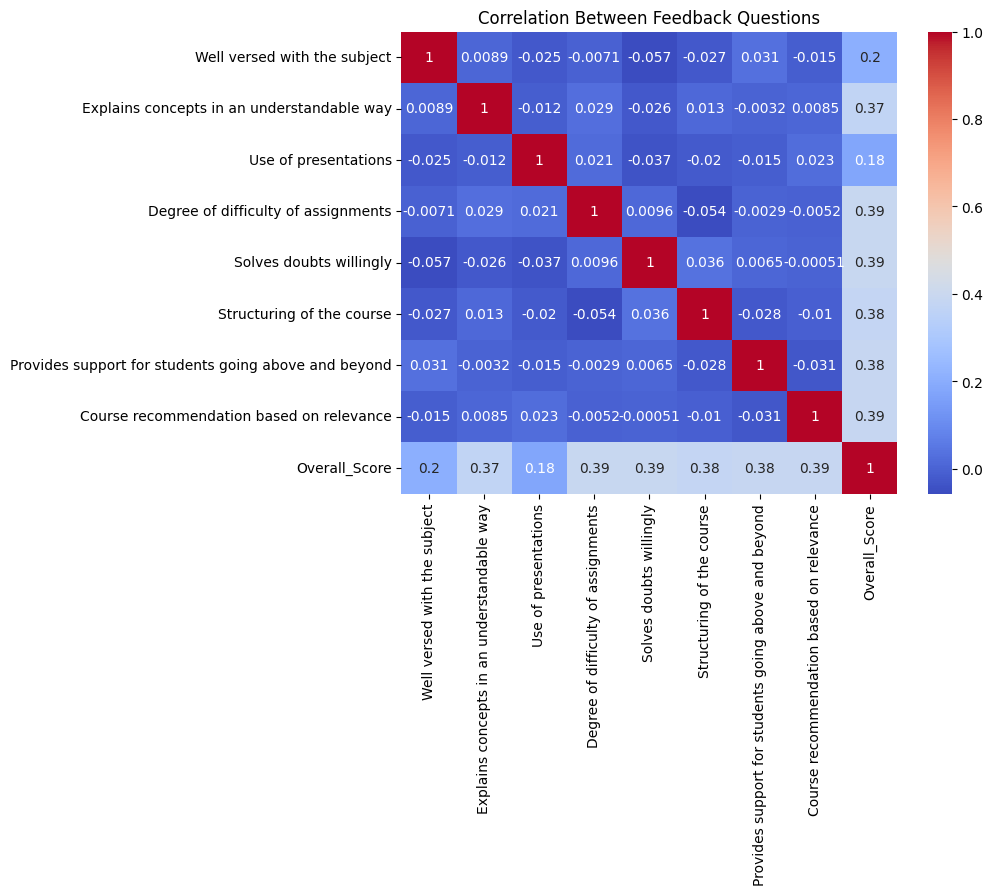

In [21]:

# STEP 5: Overall Satisfaction Score per Student
df['Overall_Score'] = df.drop(columns=['Student ID']).mean(axis=1)
print("\nSample Overall Scores:\n", df[['Student ID','Overall_Score']].head())

# Plot distribution of overall scores
plt.figure(figsize=(6,4))
sns.histplot(df['Overall_Score'], bins=5, kde=True, color="blue")
plt.title("Distribution of Overall Satisfaction Scores")
plt.xlabel("Score (1-5)")
plt.ylabel("Number of Students")
plt.show()

# STEP 6: Identify Strong & Weak Areas
best_aspect = question_avg.idxmax()
worst_aspect = question_avg.idxmin()

print(f"\nBest Rated Aspect: {best_aspect} ({question_avg.max():.2f}/5)")
print(f"Worst Rated Aspect: {worst_aspect} ({question_avg.min():.2f}/5)")

# STEP 7: Correlation Heatmap (Optional)
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Student ID']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Feedback Questions")
plt.show()
